In [2]:
#standardizing the dataset
from sklearn import preprocessing
import pandas as pd
data = pd.read_table("data_set/data_set_travel.csv",sep=",",header=0,index_col=0)
data

,Galerie_Art,Club_Danse,Bar_Jus,Restaurant,Musees,Station_Vacances,Parc_Pique-nique,Plage,Theatre,Religieux
UserID,,,,,,,,,,
User1,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
User2,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
User3,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
User4,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
User5,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54
...,...,...,...,...,...,...,...,...,...,...
User976,0.74,1.12,0.30,0.53,0.88,1.38,3.17,2.78,0.99,3.20
User977,1.25,0.92,1.12,0.38,0.78,1.68,3.18,2.79,1.34,2.80
User978,0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34,3.02


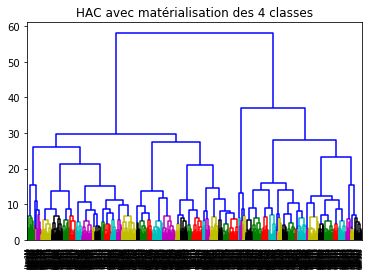

In [5]:
data_cr = preprocessing.scale(data)

#libraries for plotting and HAC
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

#generate the linkage matrix - ward's method
Z = linkage(data_cr,method='ward',metric='euclidean')

#highlighting of the 4 groups (height t = 7)
plt.title('HAC avec matérialisation des 4 classes')
dendrogram(Z,labels=data.index,orientation='top',color_threshold=7)
plt.show()

In [6]:
#cutting at the height t = 7 ==> cluster membership of cases
groupes_cah = fcluster(Z,t=7,criterion='distance')
print(groupes_cah)

[42 44 15 10  8 19 21 32 16 27 51 52 37 41 44 54  6 36 51 36  8 21 22 30
 13 54 39 16 32 45 37 54 47 51 29 26  6 29 37  1 21 22  5 17 24 18 26 14
 52 39 20 38 47 14 19 32 43 17 45 47 44  1 29 25  7 14  6 14  5  9  1 37
 50  7 43 54 29 42 22 21 18 17 34 14  4 32 15 22 35 10 29 32 53 45 53 17
 43 14 41 27 17 31 42  9 19 37 51 22 20 50 41  5 50 12 37 23 42 31 30  6
 47 49 54  4 49 17  5 16 20 31  5 47 38  8 30 51 42  8 17 29 32 31 21 28
 26 52 48 36 51 47  7 10 10 10 17 29 24 18 53  6  5 29 50 26  5 17 37 28
 37 26 51  1 10 19 17 11  7 26 17 31 26 49 16  6 45 17 49 17 43 22 39 38
 18 30 31 32  5 45 25 34 47 17 37 31 12  6 17 26  5 20  5 43 10 12 22 45
 22 15 48  7 49  6 54 19 45 21 35  8 52 36 26 36  6 10 48 31  7 11 48  1
 37 53 28 29 29 26  1 33 20 31  8 31 39 39  9 30 19 34  1 39 43 41 23 41
 19 43 45 42 28 47 21 12 39 36 33 22 16 51  6 48  6 24 38 49 17 10 35 28
 20 21 43 22  5 26 32 15 31 38  4 42 32 38 37 31 14 10 51 41  1 39 28 31
  5 47 50 13 45 32 37 19 23 29  2 12 12 45 41 47 16

In [193]:
import numpy as np
idg = np.argsort(groupes_cah)
#pd.set_option('display.max_rows', data.shape[0]+1)
pd.set_option('display.max_info_rows', data.shape[0]+1)
print(pd.DataFrame(data.index[idg],groupes_cah[idg]))

     UserID
1   User247
1   User595
1   User172
1   User662
1   User673
..      ...
54  User494
54  User223
54  User501
54  User427
54  User603

[980 rows x 1 columns]


In [194]:
#k-means on the standardized dataset
from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=4)
kmeans.fit(data_cr)
print(kmeans.inertia_)

#sorted index of the clusters
idk = np.argsort(kmeans.labels_)
print(pd.DataFrame(data.index[idk],kmeans.labels_[idk]))

6464.985813532301
     UserID
0   User758
0   User689
0   User691
0   User692
0   User693
..      ...
3   User769
3   User768
3   User600
3   User278
3   User490

[980 rows x 1 columns]


In [195]:
#distances to the centroids for each instance
print(kmeans.transform(data_cr))

[[4.25368477 1.66674081 5.98896654 3.33188701]
 [7.2260411  4.16331804 7.4285526  6.28851236]
 [2.49392212 3.72929    6.45413429 3.11342298]
 ...
 [1.98487169 3.50458346 6.62259334 2.41946323]
 [3.95724516 5.67569787 8.02622393 4.63384146]
 [3.52817545 2.50742385 6.554062   2.88671537]]


In [158]:
#equivalences with the HAC clusters
pd.crosstab(groupes_cah,kmeans.labels_)

col_0,0,1,2,3
row_0,,,,
1,1,19,0,2
2,2,1,0,0
3,4,0,0,0
4,6,0,0,7
5,1,30,0,0
6,0,31,0,0
7,14,8,0,0
8,14,1,0,3
9,0,18,0,0


In [159]:
#library for evaluating the partitions
from sklearn import metrics

#measuring the “silhouette” score
#by varying the number of clusters from 2 to 10
res = np.arange(9,dtype="double")
for k in np.arange(9):
    km = cluster.KMeans(n_clusters=k+2)
    km.fit(data_cr)
    res[k] = metrics.silhouette_score(data_cr,km.labels_)
    
print(res)

[0.21315363 0.21774995 0.14922694 0.15957242 0.13944466 0.13583753
 0.13636779 0.13891301 0.14016805]


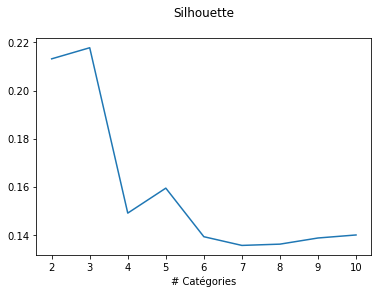

In [160]:
#plotting nb. of clusters vs. silhouette score
import matplotlib.pyplot as plt
plt.title("Silhouette\n")
plt.xlabel("# Catégories")
plt.plot(np.arange(2,11,1),res)
plt.show()

In [161]:
#overall mean for each variable
m = data.mean()
#TSS (total sum of squares)
TSS = data.shape[0]*data.var(ddof=0)
print(TSS)

Galerie_Art         104.627303
Club_Danse          223.948113
Bar_Jus             608.840888
Restaurant           76.606375
Musees              187.326731
Station_Vacances    284.988170
Parc_Pique-nique      0.059936
Plage                18.510696
Theatre             130.162591
Religieux           101.116011
dtype: float64


In [162]:
#slicing the data.frame according to the groups
gb = data.groupby(kmeans.labels_)

#conditional groups size
nk = gb.size()
print(nk)

0    295
1    448
2     21
3    216
dtype: int64


In [163]:
#conditional means
mk = gb.mean()
print(mk)

   Galerie_Art  Club_Danse   Bar_Jus  Restaurant    Musees  Station_Vacances  \
0     0.893288    1.291661  0.841797    0.549627  1.178847          2.197898   
1     0.895312    1.289286  0.607054    0.429085  0.675312          1.440313   
2     1.021905    1.920000  0.559048    2.086190  1.070476          1.946667   
3     0.876157    1.512037  2.134306    0.572546  1.148889          2.182963   

   Parc_Pique-nique     Plage   Theatre  Religieux  
0          3.180237  2.892034  1.660542   2.718949  
1          3.176071  2.827991  1.510201   3.017165  
2          3.181429  2.723810  1.509048   2.515238  
3          3.191944  2.782731  1.573750   2.484444  


In [164]:
#square(difference between cond. means and overall mean)
EMk = (mk-m)**2

#weighted by the size of the groups
EM = EMk.multiply(nk,axis=0)

#sum => BSS (between sum of squares)
BSS = np.sum(EM,axis=0)
print(BSS)

Galerie_Art           0.412602
Club_Danse           15.142951
Bar_Jus             358.383553
Restaurant           55.917196
Musees               57.998338
Station_Vacances    134.992346
Parc_Pique-nique      0.036927
Plage                 1.831341
Theatre               4.101153
Religieux            46.276479
dtype: float64


In [165]:
#square of the correlation ratio
#i.e. proportion of variance explained
#for each variable
R2 = BSS/TSS
print(R2)

Galerie_Art         0.003944
Club_Danse          0.067618
Bar_Jus             0.588633
Restaurant          0.729929
Musees              0.309611
Station_Vacances    0.473677
Parc_Pique-nique    0.616100
Plage               0.098934
Theatre             0.031508
Religieux           0.457657
dtype: float64


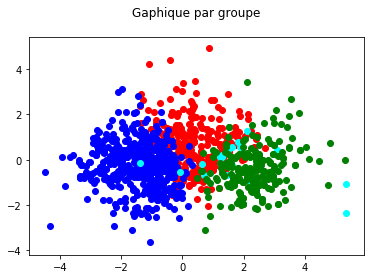

In [174]:
#PCA
from sklearn.decomposition import PCA
acp = PCA(n_components=2).fit_transform(data_cr)
plt.title("Gaphique par groupe\n")
#plotting the individuals into the factor map
#with various colors according to the cluster membership
for couleur,k in zip(['red','blue','aqua',"green"],[0,1,2,3]):
    plt.scatter(acp[kmeans.labels_==k,0],acp[kmeans.labels_==k,1],c=couleur)
plt.show()

In [175]:
#remove the instances corresponding to the group n°3 from the k-means
data_subset = data.iloc[kmeans.labels_!=2,:]
print(data_subset.shape)

(959, 10)


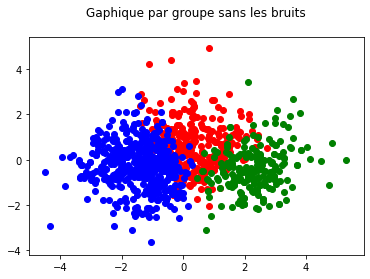

In [177]:
#PCA après suupression des bruits
from sklearn.decomposition import PCA
acp = PCA(n_components=2).fit_transform(data_cr)
plt.title("Gaphique par groupe sans les bruits\n")
#plotting the individuals into the factor map
#with various colors according to the cluster membership
for couleur,k in zip(['red','blue','green'],[0,1,3]):
    plt.scatter(acp[kmeans.labels_==k,0],acp[kmeans.labels_==k,1],c=couleur)
plt.show()

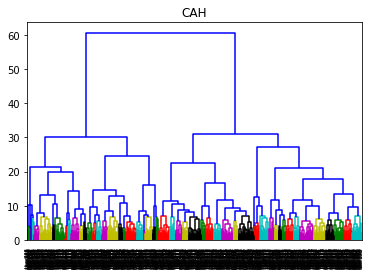

In [182]:
#standardize the new version of the dataset
data_subset_cr = preprocessing.scale(data_subset)

#generate the linkage matrix
Z_subset = linkage(data_subset_cr,method='ward',metric='euclidean')

#hac and plotting the dendrogram
plt.title("CAH")
dendrogram(Z_subset,labels=data_subset.index,orientation='top',color_threshold=7)
plt.show()


In [ ]:
#PCA
acp_subset = PCA(n_components=2).fit_transform(data_subset_cr)

#plotting the individuals into the factor map
#with various colors according to the cluster membership
plt.figure(figsize=(18,7.715))
for couleur,k in zip(['blue','lawngreen','aqua'],[1,2,3]):
    plt.scatter(acp_subset[groupes_subset_cah==k,0],acp_subset[groupes_subset_cah==k,1],c=couleur)

#set the row names into the scatter plot
for i,label in enumerate(data_subset.index):
    plt.annotate(label,(acp_subset[i,0],acp_subset[i,1]))

plt.figure(figsize=(15,10))
plt.show() 